# Test the implementation of the test problems

### Comments

1. The testproblems were translated from MATLAB to Python. The original source is [here](http://www2.compute.dtu.dk/~pcha/Regutools/regutools.html).
2. To run this file, you also need to install [TomoPy](https://github.com/tomopy/tomopy), for the images. 
3. Make sure you also have the file testproblems.y=o

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

from testproblems import gravity, blur

## Gravity problem

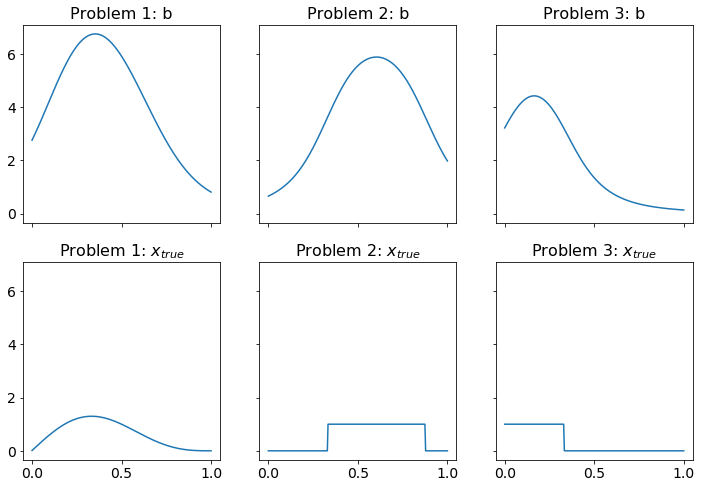

In [2]:
f, axarray = plt.subplots(2,3, sharex = True, sharey = True, figsize = (12,8))

n = 256
t = np.linspace(0,1,n)

for i in range(3):
    A, b, xtrue = gravity(n, example = i)
    
    axarray[0,i].plot(t, b)
    axarray[0,i].set_title('Problem ' + str(i+1) + ': b', fontsize = 16)
    axarray[1,i].plot(t, xtrue)
    axarray[1,i].set_title('Problem ' + str(i+1) + ': $x_{true}$', fontsize = 16)


# Investigating the naive solution

Signal to noise ratio 0.015153938408664816


Text(0.5,1,'1% noise')

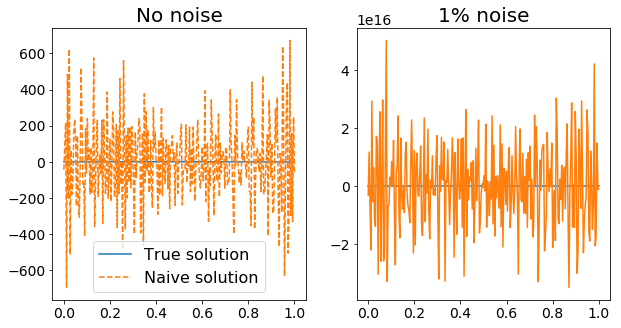

In [3]:
f, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
A, b, xtrue = gravity(n, example = 0)

# Reconstruction with no noise
x = np.linalg.solve(A,b)
ax1.plot(t, xtrue, t, x, '--')
ax1.legend({'True solution', 'Naive solution'}, fontsize = 16)
ax1.set_title('No noise', fontsize = 20)

# Adding noise
noise = 0.01*np.linalg.norm(b, np.inf)*np.random.randn(b.size) 
bn = b + noise
print "Signal to noise ratio", np.linalg.norm(noise)/np.linalg.norm(b)

A, b, xtrue = gravity(n, example = 0)
x = np.linalg.solve(A,bn)
ax2.plot(t, xtrue, t, x)
ax2.set_title('1% noise', fontsize = 20)

### Plot the singular values of A

Text(0.5,1,'Singular values of A')

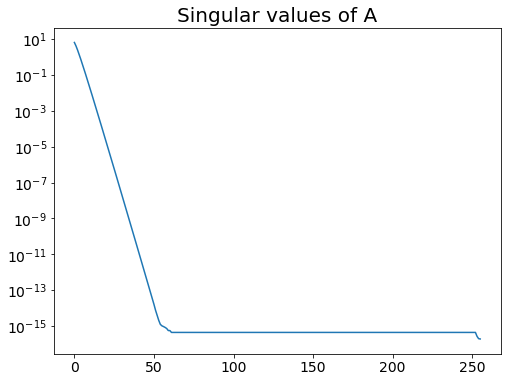

In [4]:
u, s, vh = np.linalg.svd(A)
plt.figure(figsize = (8,6))
plt.semilogy(s)
plt.title('Singular values of A', fontsize = 20)

### Plot the singular vectors 

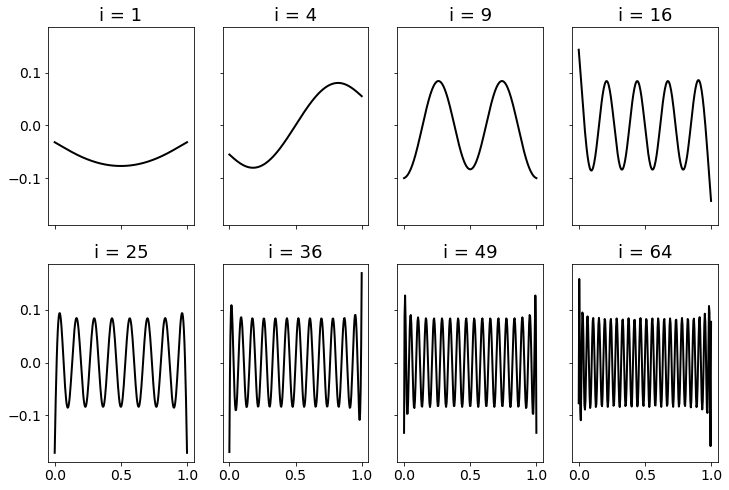

In [5]:
v = vh.T
f, axarray = plt.subplots(2,4,sharex = True, sharey = True, figsize = (12,8))
for i, ax in enumerate(axarray.flatten()):
    ax.plot(t,v[:,i**2], 'k-', linewidth = 2.0)
    ax.set_title('i = ' + str((i+1)**2), fontsize = 18)

# Truncated SVD

Noise to signal ratio 0.013686911535303378


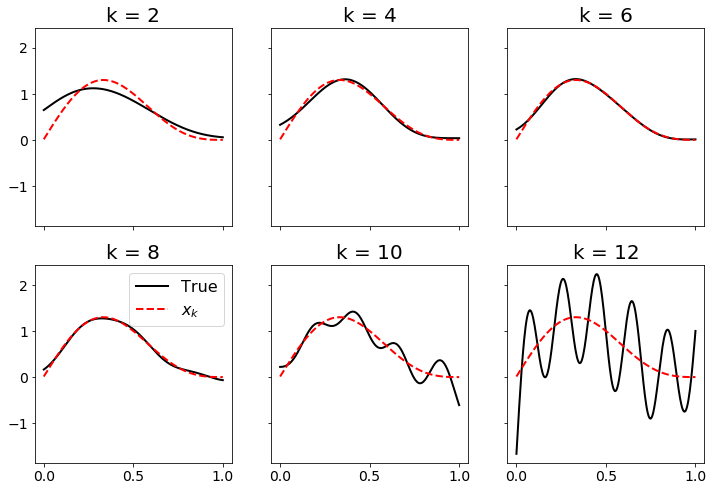

In [6]:
klst = [2,4,6,8,10,12]

#
n = 256
A, b, xtrue = gravity(n, example = 0)
noise = 0.01*np.linalg.norm(b, np.inf)*np.random.randn(b.size) 
bn = b + noise
print "Noise to signal ratio", np.linalg.norm(noise)/np.linalg.norm(b)

t = np.linspace(0,1,n)

f, axarray = plt.subplots(2,3, sharex = True, sharey = True, \
                            figsize = (12,8))
u,s,vh = np.linalg.svd(A, full_matrices = False)
for i, ax in enumerate(axarray.flatten()):
    k = klst[i]
    uk = u[:,:k]; sk = s[:k]; vhk = vh[:k,:]
    xk = np.dot(vhk.T,np.linalg.solve(np.diag(sk),np.dot(uk.T,bn)))
    
    ax.plot(t, xk, 'k-', t, xtrue, 'r--', linewidth = 2.0)
    ax.set_title('k = ' + str(k), fontsize = 20)
    
    if i == 3: ax.legend({ '$x_k$', 'True'}, fontsize = 16)

# Tikhonov regularization

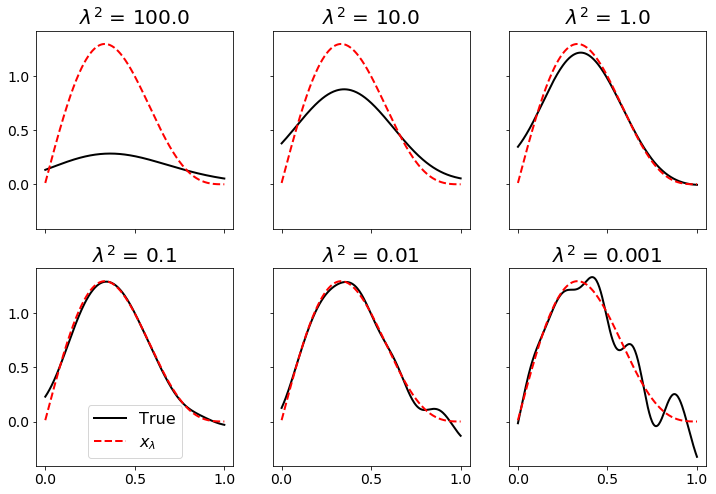

In [7]:
l2lst = [1e2,1e1,1e0,1e-1,1e-2,1e-3]

t = np.linspace(0,1,n)
f, axarray = plt.subplots(2,3, sharex = True, sharey = True, figsize = (12,8))
for i, ax in enumerate(axarray.flatten()):
    l = l2lst[i]
    sl = np.diag(s/(l+s**2.)); D = np.diag(sl)
    xk = np.dot(vh.T,np.dot(np.diag(D),np.dot(u.T,bn)))
    
    ax.plot(t, xk, 'k-', t, xtrue, 'r--', linewidth = 2.0)
    ax.set_title('$\lambda^2$ = ' + str(l), fontsize = 20)
    
    if i == 3: ax.legend({ '$x_\lambda$', 'True'}, fontsize = 16)
    

## 2D Blur Example 

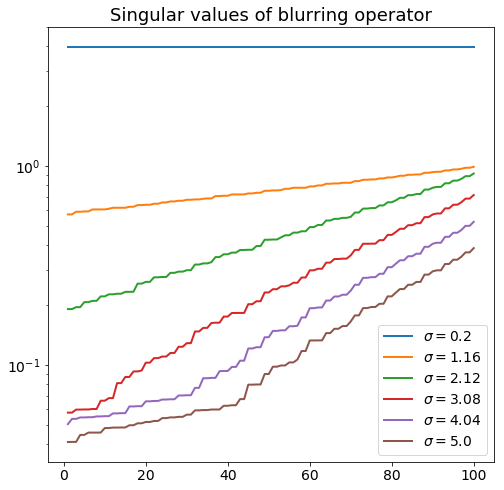

In [8]:
from scipy.sparse.linalg import svds

sigma = np.linspace(0.2,5.0, 6)
plt.figure(figsize = (8,8))
for i in range(sigma.size):
    A, b, xtrue = blur(40, band = 5, sigma = sigma[i])
    u,s,vh = svds(A, k = 100)
    
    plt.semilogy(range(1, s.size+1),s, label = '$\sigma = $' + str(round(sigma[i],2)), linewidth = 2.0)
    plt.title('Singular values of blurring operator', fontsize = 18)
    
plt.legend(fontsize = 14)

### Plot of the sparsity of the matrix

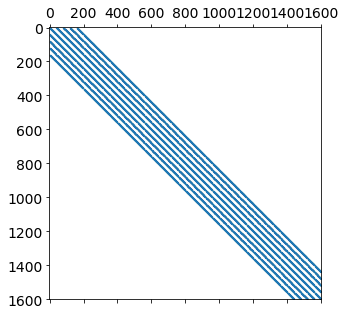

In [9]:
plt.figure()
plt.spy(A, markersize = 0.1)

### Plot the various test images

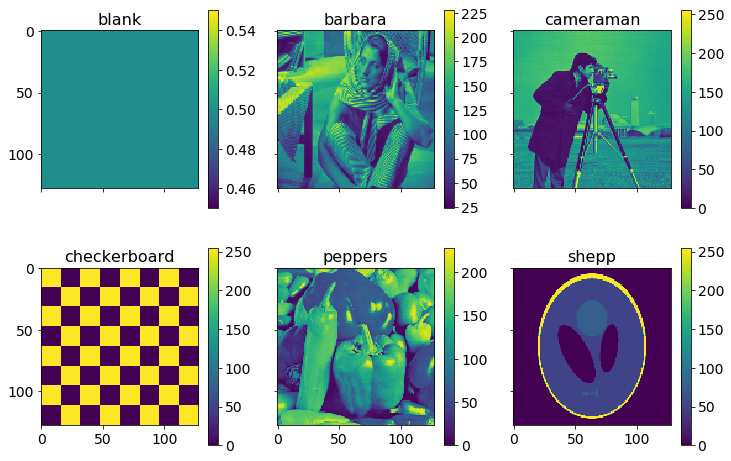

In [10]:
f, axarray = plt.subplots(2,3, sharex = True, sharey = True, figsize = (12,8))
lst = ['blank', 'barbara', 'cameraman','checkerboard', 'peppers', 'shepp']
n = 128
for j, ax in enumerate(axarray.flat):
    A, b, xtrue = blur(n, band = 5, sigma = 5, phant = lst[j])
    cax = ax.imshow(xtrue.reshape(n,n))
    f.colorbar(cax, ax = ax)
    ax.set_title(lst[j], fontsize = 16)
    

### Truncated SVD solution

Signal to noise ratio 0.015067500883428286


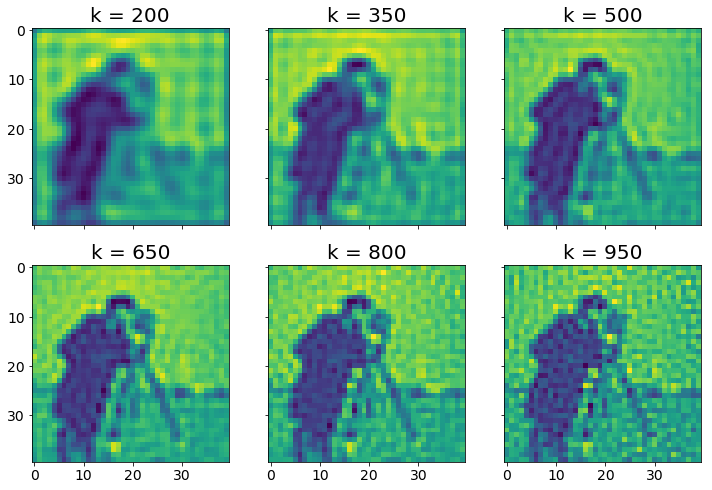

In [11]:
klst = range(200,1600,150)

#
n = 40
A, b, xtrue = blur(n, band = 10, sigma = 1.0, phant = 'cameraman')
A = A.todense()
noise = 0.01*np.linalg.norm(b, np.inf)*np.random.randn(b.size) 
bn = b + noise
print "Signal to noise ratio", np.linalg.norm(noise)/np.linalg.norm(b)

bn = bn[:,np.newaxis]

f, axarray = plt.subplots(2,3, sharex = True, sharey = True, figsize = (12,8))
u,s,vh = np.linalg.svd(A, full_matrices = False)
for i, ax in enumerate(axarray.flatten()):
    k = klst[i]
    uk = u[:,:k]; sk = s[:k]; vhk = vh[:k,:]
    xk = np.dot(vhk.T,np.linalg.solve(np.diag(sk),np.dot(uk.T,bn)))
    
    ax.imshow( xk.reshape(n,n))
    ax.set_title('k = ' + str(k), fontsize = 20)
    

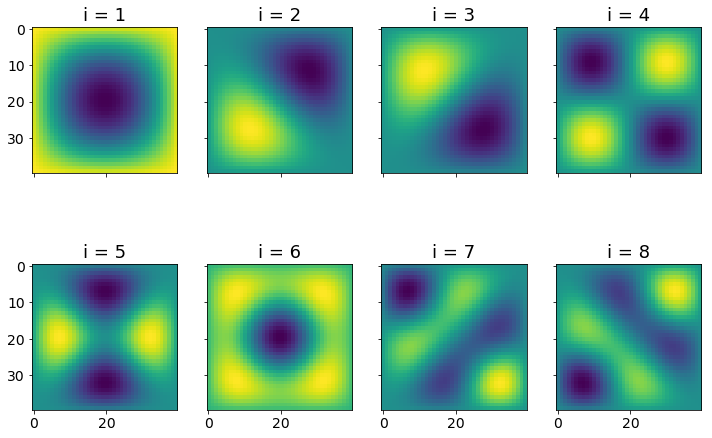

In [12]:
v = vh.T
f, axarray = plt.subplots(2,4,sharex = True, sharey = True, figsize = (12,8))
for i, ax in enumerate(axarray.flatten()):
    ax.imshow(v[:,i].reshape(n,n), )
    ax.set_title('i = ' + str((i+1)), fontsize = 18)

### Tikhonov regularization

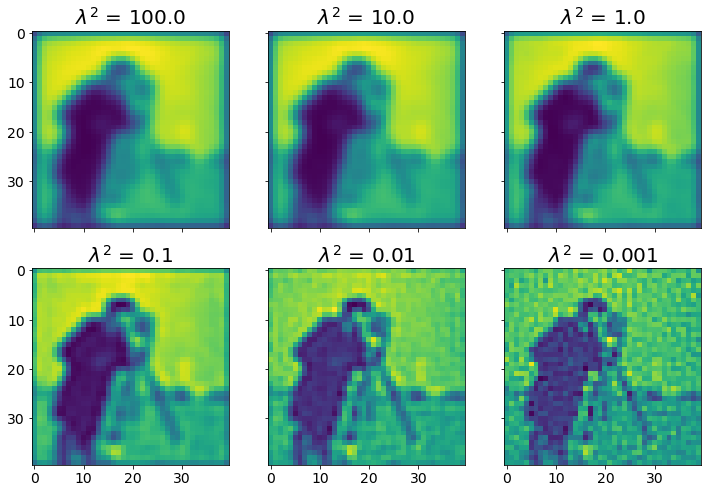

In [13]:
l2lst = [1e2,1e1,1e0,1e-1,1e-2,1e-3]

t = np.linspace(0,1,n)
f, axarray = plt.subplots(2,3, sharex = True, sharey = True, figsize = (12,8))
for i, ax in enumerate(axarray.flatten()):
    l = l2lst[i]
    sl = np.diag(s/(l+s**2.)); D = np.diag(sl)
    xk = np.dot(vh.T,np.dot(np.diag(D),np.dot(u.T,bn)))
    
    ax.imshow( xk.reshape(n,n))
    ax.set_title('$\lambda^2$ = ' + str(l), fontsize = 20)